In [14]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from six.moves import range
from sklearn import preprocessing
from sklearn import metrics

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

# Step 1: Loading Data

In [15]:
# Read the CSV file into a DataFrame: df
df = pd.read_excel('https://query.data.world/s/s3t37yqxxeoabyocyh6g33fojskwvq', skiprows = 3)
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,DatabaseServers,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),NaN,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,No,2,Not Asked,None,Not Asked,500,Associates (2 years),No,"No, I never have",40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,None,Not Asked,30,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


# Step 2: Data Wranggling

In [16]:
#Select only the columns significant.
df = df[['PrimaryDatabase',
         'YearsWithThisDatabase',
         'EmploymentStatus',
         'JobTitle',
         'ManageStaff',
         'YearsWithThisTypeOfJob',
         'OtherPeopleOnYourTeam',
         'Education',
         'EducationIsComputerRelated',
         'Certifications',
         'HoursWorkedPerWeek',
         'TelecommuteDaysPerWeek',
         'EmploymentSector',
         'SalaryUSD']]
df.head()

,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,SalaryUSD
0,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business,200000
1,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business,61515
2,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business,95000
3,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business,56000
4,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business,35000


In [17]:
#Any NaN Values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 14 columns):
PrimaryDatabase               6893 non-null object
YearsWithThisDatabase         6893 non-null int64
EmploymentStatus              6893 non-null object
JobTitle                      6893 non-null object
ManageStaff                   6893 non-null object
YearsWithThisTypeOfJob        6893 non-null int64
OtherPeopleOnYourTeam         6893 non-null object
Education                     6893 non-null object
EducationIsComputerRelated    5677 non-null object
Certifications                6893 non-null object
HoursWorkedPerWeek            6893 non-null int64
TelecommuteDaysPerWeek        6893 non-null object
EmploymentSector              6893 non-null object
SalaryUSD                     6893 non-null object
dtypes: int64(3), object(11)
memory usage: 754.0+ KB


In [18]:
#Fill in NaN values in "Education IsComputerRelated" with Mode
df['EducationIsComputerRelated'].mode()

0    Yes
dtype: object

In [19]:
df['EducationIsComputerRelated'] = df['EducationIsComputerRelated'].fillna(df['EducationIsComputerRelated'].mode()[0])
df.head()

,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,SalaryUSD
0,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business,200000
1,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),Yes,"No, I never have",35,2,Private business,61515
2,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business,95000
3,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business,56000
4,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business,35000


##### Combine similar categorical input data, rename data

In [20]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace(
    ["Full time employee",
     "Full time employee of a consulting/contracting company"], "Full Time")
df['EmploymentStatus'] = df['EmploymentStatus'].replace(
    ["Independent consultant, contractor, freelancer,  or company owner",
     "Independent or freelancer or company owner",
     "Part time"], "Part Time")

In [21]:
df['JobTitle'] = df['JobTitle'].replace(
    ["DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)",
     "DBA (Production Focus - build & troubleshoot servers, HA/DR)",
     "DBA (Development Focus - tunes queries, indexes, does deployments)"], "DBA")
df['JobTitle'] = df['JobTitle'].replace(
    ["Developer: T-SQL",
     "Developer: Business Intelligence (SSRS, PowerBI, etc)",
     "Developer: App code (C#, JS, etc)",
     "DBA / BI Developer"], "Developer")
df['JobTitle'] = df['JobTitle'].replace(["DevOps, Sr Software Engineer DBA", "Principal database engineer"], "Engineer")
df['JobTitle'] = df['JobTitle'].replace(["Analytics consultant", "Sr Consultant "], "Consultant")
df['JobTitle'] = df['JobTitle'].replace("Sales", "Salesman")

In [22]:
df['OtherPeopleOnYourTeam'] = df['OtherPeopleOnYourTeam'].replace("None", 0)
df['OtherPeopleOnYourTeam'] = df['OtherPeopleOnYourTeam'].replace("More than 5", 5)

In [23]:
df['Education'] = df['Education'].replace("Bachelors (4 years)", "Bachelors")
df['Education'] = df['Education'].replace("None (no degree completed)", "None")
df['Education'] = df['Education'].replace("Associates (2 years)", "Associates")
df['Education'] = df['Education'].replace("Doctorate/PhD", "Doctorate")

In [24]:
df['Certifications'] = df['Certifications'].replace(["Yes, and they're currently valid", "Yes, but they expired"], "Yes")
df['Certifications'] = df['Certifications'].replace("No, I never have", "No")

In [25]:
df['TelecommuteDaysPerWeek'] = df['TelecommuteDaysPerWeek'].replace("None, or less than 1 day per week", 0)
df['TelecommuteDaysPerWeek'] = df['TelecommuteDaysPerWeek'].replace("5 or more", 5)

In [26]:
df['EmploymentSector'] = df['EmploymentSector'].replace(
    ["State/province government",
     "Local government",
     "Federal government"], "Government")
df['EmploymentSector'] = df['EmploymentSector'].replace("Education (K-12, college, university)", "Education Inst")

##### Fix string-like data error

In [27]:
# Find typo data in SalaryUSD
df.SalaryUSD[df.SalaryUSD == '50 621'].index.tolist()

df.loc[5968, 'SalaryUSD'] = 50621
df.loc[6123, 'SalaryUSD'] = 110000
df.loc[6419, 'SalaryUSD'] = 66000

In [28]:
#Change to float
df['YearsWithThisDatabase'] = df.YearsWithThisDatabase.astype(float)
df['YearsWithThisTypeOfJob'] = df.YearsWithThisTypeOfJob.astype(float)
df['OtherPeopleOnYourTeam'] = df.OtherPeopleOnYourTeam.astype(float)
df['HoursWorkedPerWeek'] = df.HoursWorkedPerWeek.astype(float)
df['TelecommuteDaysPerWeek'] = df.TelecommuteDaysPerWeek.astype(float)
df['SalaryUSD'] = df.SalaryUSD.astype(float)

In [29]:
df.head()

,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,SalaryUSD
0,Microsoft SQL Server,10.0,Full Time,DBA,No,5.0,2.0,Masters,No,Yes,45.0,1.0,Private business,200000.0
1,Microsoft SQL Server,15.0,Full Time,DBA,No,3.0,1.0,None,Yes,No,35.0,2.0,Private business,61515.0
2,Microsoft SQL Server,5.0,Full Time,Other,Yes,25.0,2.0,Masters,Yes,Yes,45.0,0.0,Private business,95000.0
3,Microsoft SQL Server,6.0,Full Time,DBA,No,2.0,0.0,Associates,No,No,40.0,1.0,Private business,56000.0
4,Microsoft SQL Server,10.0,Full Time,DBA,No,10.0,0.0,Bachelors,Yes,Yes,40.0,0.0,Private business,35000.0


In [30]:
#Convert Categorical Data to Number.
df['EmploymentStatus'].replace('Full Time', 0, inplace=True)
df['EmploymentStatus'].replace('Part Time', 1, inplace=True)

df['ManageStaff'].replace('Yes', 0, inplace=True)
df['ManageStaff'].replace('No', 1, inplace=True)

df['Certifications'].replace('Yes', 0, inplace=True)
df['Certifications'].replace('No', 1, inplace=True)

df['EducationIsComputerRelated'].replace('Yes', 0, inplace=True)
df['EducationIsComputerRelated'].replace('No', 1, inplace=True)

df['Education'].replace('None', 0, inplace=True)
df['Education'].replace('Associates', 1, inplace=True)
df['Education'].replace('Bachelors', 2, inplace=True)
df['Education'].replace('Masters', 3, inplace=True)
df['Education'].replace('Doctorate', 4, inplace=True)

df['EmploymentSector'].replace('Private business', 0, inplace=True)
df['EmploymentSector'].replace('Government', 1, inplace=True)
df['EmploymentSector'].replace('Non-profit', 2, inplace=True)
df['EmploymentSector'].replace('Education Inst', 3, inplace=True)
df['EmploymentSector'].replace('Student', 4, inplace=True)

df['JobTitle'].replace('DBA', 0, inplace=True)
df['JobTitle'].replace('Developer', 1, inplace=True)
df['JobTitle'].replace('Architect', 2, inplace=True)
df['JobTitle'].replace('Manager', 3, inplace=True)
df['JobTitle'].replace('Analyst', 4, inplace=True)
df['JobTitle'].replace('Engineer', 5, inplace=True)
df['JobTitle'].replace('Other', 6, inplace=True)
df['JobTitle'].replace('Data Scientist', 7, inplace=True)
df['JobTitle'].replace('Consultant', 8, inplace=True)
df['JobTitle'].replace('Systems Administrator', 9, inplace=True)
df['JobTitle'].replace('Salesman', 10, inplace=True)
df['JobTitle'].replace('Database Specialist', 11, inplace=True)
df['JobTitle'].replace('Technician ', 12, inplace=True)

df['PrimaryDatabase'].replace('Microsoft SQL Server', 0, inplace=True)
df['PrimaryDatabase'].replace('Oracle', 1, inplace=True)
df['PrimaryDatabase'].replace('PostgreSQL', 2, inplace=True)
df['PrimaryDatabase'].replace('Other', 3, inplace=True)
df['PrimaryDatabase'].replace('MySQL/MariaDB', 4, inplace=True)
df['PrimaryDatabase'].replace('Azure SQL DB', 5, inplace=True)
df['PrimaryDatabase'].replace('DB2', 6, inplace=True)
df['PrimaryDatabase'].replace('Microsoft Access', 7, inplace=True)
df['PrimaryDatabase'].replace('Amazon RDS (any flavor)', 8, inplace=True)
df['PrimaryDatabase'].replace('SAP', 9, inplace=True)
df['PrimaryDatabase'].replace('Teradata', 10, inplace=True)
df['PrimaryDatabase'].replace('MongoDB', 11, inplace=True)
df['PrimaryDatabase'].replace('SQLite', 12, inplace=True)
df['PrimaryDatabase'].replace('Elasticsearch', 13, inplace=True)
df['PrimaryDatabase'].replace('Cassandra', 14, inplace=True)

# Step 3: Splitting, Fitting of training & test set, Predicting

In [32]:
from sklearn.linear_model import LinearRegression
X = df.drop('SalaryUSD', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, df.SalaryUSD)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 94240.24509851,  72538.68548997, 124972.45277621,  80403.05994535,
        88187.03926693])

Text(0, 0.5, 'Frequency')

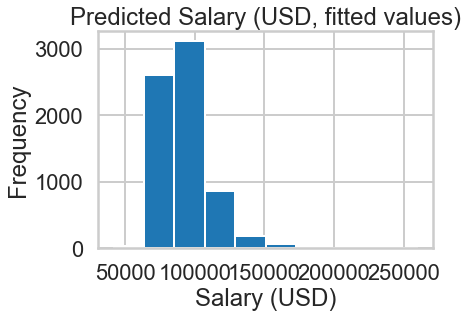

In [35]:
plt.hist(lm.predict(X))
plt.title('Predicted Salary (USD, fitted values)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Prices vs Predicted Prices')

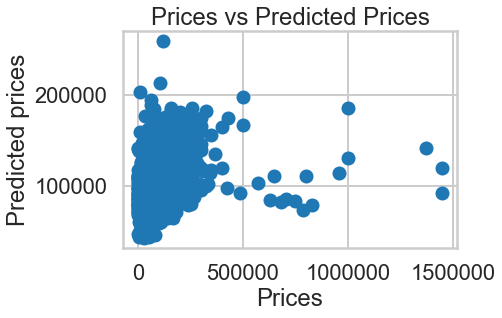

In [37]:
plt.scatter(df.SalaryUSD, lm.predict(X))
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")

# Step 4: R-squared